# Kaggle titanic
 - 1. Dataset check
 - 2. EDA - Pclass
 - 3. EDA - Sex
 - 4. EDA - Age

## 1. Dataset check

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # plt의 그림 표기는 seaborn으로
sns.set(font_scale = 2.5) # 모든  폰트 사이즈는 2.5

import missingno as msno # NaN값을 쉽게 볼 수 있는 라이브러리

import warnings # ignore
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
import os
print (os.getcwd())

C:\Users\dxodn\Desktop\Github\Dummy


In [6]:
#train, test 셋 가져오기
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [7]:
df_train.head() # 데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.shape

(891, 12)

In [9]:
df_train.describe() # 각 피처 통계 확인(결측치를 알 수 있음, 카테고리 형은 나오지 않는 듯)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df_train.columns # 컬럼명 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# NaN값 비율 확인

In [13]:
for col in df_train.columns:
    # 컬럼명을 우측정렬하고, 각 컬럼별 데이터(df_train[col]) 중 isnull로 boolean으로 값을 나타내고, NaN은 전부 합함.
    # 그것들을 각 컬럼의 열 수로 나누면 NaN 퍼센트를 알 수 있음.
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * 
                                                                   (df_train[col].isnull().sum() / df_train[col].shape[0]))
# 값 모르면 하나씩 찍어보기
#     print(df_train[col]) # 컬럼명에 해당하는 값이 나옴. PassengerId면 사람 이름...
#     print(df_train[col].isnull()) # 값이 NaN이면 True 아니면 False
    print(df_train[col].isnull().sum()) # 각 컬럼에 해당하는 값들의 NaN값의 갯수를 합함
#     print(df_train[col].shape[0]) # == ("892",) NaN의 갯수 / 전체 갯수
    print(msg)

0
column: PassengerId 	 Percent of NaN value: 0.00%
0
column:   Survived 	 Percent of NaN value: 0.00%
0
column:     Pclass 	 Percent of NaN value: 0.00%
0
column:       Name 	 Percent of NaN value: 0.00%
0
column:        Sex 	 Percent of NaN value: 0.00%
177
column:        Age 	 Percent of NaN value: 19.87%
0
column:      SibSp 	 Percent of NaN value: 0.00%
0
column:      Parch 	 Percent of NaN value: 0.00%
0
column:     Ticket 	 Percent of NaN value: 0.00%
0
column:       Fare 	 Percent of NaN value: 0.00%
687
column:      Cabin 	 Percent of NaN value: 77.10%
2
column:   Embarked 	 Percent of NaN value: 0.22%


In [14]:
False + True # print(df_train[col].isnull().sum())을 하면 어떻게 NaN의 값을 세어주는가? True가 1, False가 0이니까 다 더하면 해당 컬럼의 NaN 갯수가 나오는 거.

1

In [15]:
# 자료를 찾거나 변경하고 싶은 line을 클릭만 하고 비활성화(커서가 없는 상태)에서 F를 누르고 원하는 문자만 변경해줄 수 있다.(아래는 위에 거 복사해서 이 방법으로 df_train을 test로 변경한 거임)

In [16]:
for col in df_test.columns:
    # 컬럼명을 우측정렬하고, 각 컬럼별 데이터(df_test[col]) 중 isnull로 boolean으로 값을 나타내고, NaN은 전부 합함.
    # 그것들을 각 컬럼의 열 수로 나누면 NaN 퍼센트를 알 수 있음.
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * 
                                                                   (df_test[col].isnull().sum() / df_test[col].shape[0]))
# 값 모르면 하나씩 찍어보기
#     print(df_test[col]) # 컬럼명에 해당하는 값이 나옴. PassengerId면 사람 이름...
#     print(df_test[col].isnull()) # 값이 NaN이면 True 아니면 False
    print(df_test[col].isnull().sum()) # 각 컬럼에 해당하는 값들의 NaN값의 갯수를 합함
#     print(df_test[col].shape[0]) # == ("892",) NaN의 갯수 / 전체 갯수
    print(msg)

0
column: PassengerId 	 Percent of NaN value: 0.00%
0
column:     Pclass 	 Percent of NaN value: 0.00%
0
column:       Name 	 Percent of NaN value: 0.00%
0
column:        Sex 	 Percent of NaN value: 0.00%
86
column:        Age 	 Percent of NaN value: 20.57%
0
column:      SibSp 	 Percent of NaN value: 0.00%
0
column:      Parch 	 Percent of NaN value: 0.00%
0
column:     Ticket 	 Percent of NaN value: 0.00%
1
column:       Fare 	 Percent of NaN value: 0.24%
327
column:      Cabin 	 Percent of NaN value: 78.23%
0
column:   Embarked 	 Percent of NaN value: 0.00%


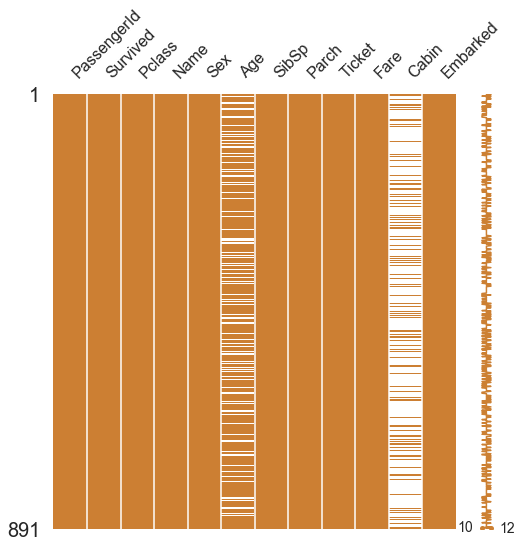

In [17]:
#  missingno로 matrix를 만들어서 NaN값 분포를 알 수 있음
msno.matrix(df = df_train.iloc[:], figsize = (8, 8), color = (0.8, 0.5, 0.2)) # color는 rgb임 전부 1이면 백

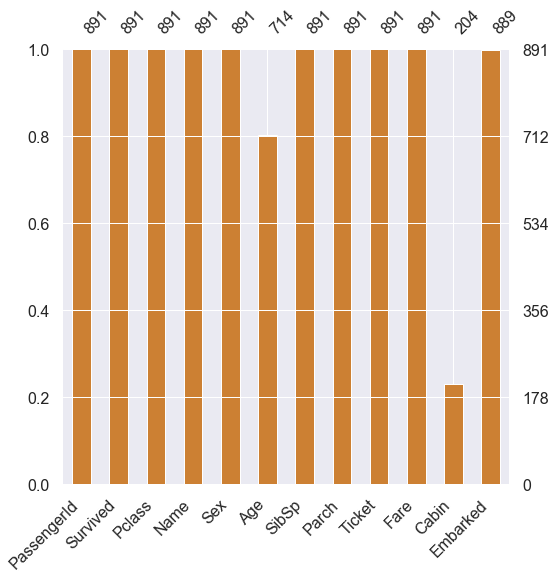

In [18]:
#  bar는 위처럼 직관적이지는 않지만 비율로 볼 수 있음.
msno.bar(df = df_train.iloc[:], figsize = (8, 8), color = (0.8, 0.5, 0.2)) # color는 rgb임 전부 1이면 백

In [19]:
# 타깃의 분포를 알아야 한다.
# 100명 중 1명 생존일 때 100명 다 사망이라고 해버리면 정확도는 99%지만 모델의 생존율 정확도는 0%라서 모델의 타겟 밸런스가 중요함.

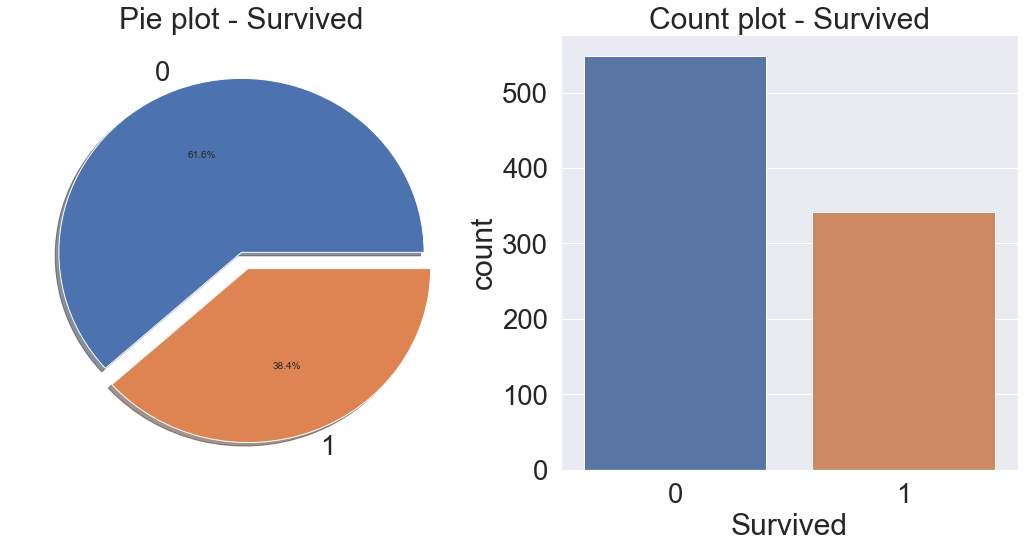

In [20]:
f, ax = plt.subplots(1, 2, figsize = (18, 8)) # 1은 low, 2는 col, 1행에 2개의 파트로 나눠진 배경을 준비. figsize는 가로, 세로

# .pie: 파이 모양으로 그려짐
# explode: 좌측이 [0]값인 0의 값의 자리이고 둘 다 0이면 그냥 파이모양인데 값을 올리면 해당 위치값에 해당하는 그래프가 원의 중심에서 바깥으로 이동, -하면 원의 중심쪽으로 이동.
# ax: 도화지 어디에서 그릴 것인가? 첫 번째 위치에 그림.
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True) # 소숫점 첫째 자리까지만 표현
ax[0].set_title('Pie plot - Survived')  # 좌측 그래프 명
ax[0].set_ylabel('') # ylabel명은 없앰, 안 해주면 Survived가 생김
sns.countplot('Survived', data = df_train, ax = ax[1]) # 세어주는 plot인데 이름은 Survived, 데이터는 df_train, 두 번째에 그려줌
ax[1].set_title('Count plot - Survived')
plt.show()
# print(df_train['Survived'].value_counts()) # [[0, 549], [1, 342]] 각 레이블의 값의 갯수를 반환(series)

## EDA - Pclass

In [21]:
# 카테고리형 데이터(데이터의 순위가 없음)

In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count() # Pclass x에 해당하는 survived의 값(0, 1)들을 다 더하면 y가 나옴

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass', 'Survived']] # 시리즈가 2개부터는 DF니까 팬시인덱싱을 사용하기 위해서.

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
5,3,0
6,1,0
7,3,0
8,3,1
9,2,1


In [24]:
for i in df_train[['Pclass', 'Survived']].groupby(['Pclass']): # Pclass 기준으로 그룹을 해주는데 Pclass는 3개의 값을 가지고 있으니 i도 3개
    print(i)
    print("check")

(1,      Pclass  Survived
1         1         1
3         1         1
6         1         0
11        1         1
23        1         1
27        1         0
30        1         0
31        1         1
34        1         0
35        1         0
52        1         1
54        1         0
55        1         1
61        1         1
62        1         0
64        1         0
83        1         0
88        1         1
92        1         0
96        1         0
97        1         1
102       1         0
110       1         0
118       1         0
124       1         0
136       1         1
137       1         0
139       1         0
151       1         1
155       1         0
..      ...       ...
763       1         1
765       1         1
766       1         0
779       1         1
781       1         1
782       1         0
789       1         0
793       1         0
796       1         1
802       1         1
806       1         0
809       1         1
815       1         0
820   

In [25]:
for i in df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True):
    print(i)

(1,      Pclass  Survived
1         1         1
3         1         1
6         1         0
11        1         1
23        1         1
27        1         0
30        1         0
31        1         1
34        1         0
35        1         0
52        1         1
54        1         0
55        1         1
61        1         1
62        1         0
64        1         0
83        1         0
88        1         1
92        1         0
96        1         0
97        1         1
102       1         0
110       1         0
118       1         0
124       1         0
136       1         1
137       1         0
139       1         0
151       1         1
155       1         0
..      ...       ...
763       1         1
765       1         1
766       1         0
779       1         1
781       1         1
782       1         0
789       1         0
793       1         0
796       1         1
802       1         1
806       1         0
809       1         1
815       1         0
820   

In [26]:
?